### **abtest 双样本独立t检验**  
https://juejin.cn/post/6984130390424289316#heading-11

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [40]:
# 读取数据，查看前5行
dict = {'A':np.random.randint(1,100,10),
        'B':np.random.randint(1,100,10)
        }
df = pd.DataFrame(dict)
df.head()

,A,B
0,29,80
1,29,62
2,52,82
3,61,94
4,79,26


In [41]:
# 数据预览，查看数据有多少行、多少列
df.shape

(10, 2)

In [42]:
# 查看数据中是否有空值
df.isnull().any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10 non-null     int32
 1   B       10 non-null     int32
dtypes: int32(2)
memory usage: 208.0 bytes


In [43]:
# 查看数据中的错误行
print((True) != (True))
print((True) != (False))
print((False) != (True))
print((False) != (False))
"""
true  != true   fasle    treatment  new_page
true  != false  true     treatment  old_page
false != true   true     control    new_page
false != false  false    control    old_page
"""

SyntaxError: invalid non-printable character U+00A0 (801591402.py, line 2)

In [ ]:
# 下面这句代码，展示的就是group=treatment且landing_page=old_page和group=control且landing_page=new_page，这样的错误行；
num_error = df[((df.group == "treatment")!=(df.landing_page == "new_page"))].shape[0]
num_error
# 去掉错误行后，再次查看是否还存在错误行
print("没有删除错误行之前的记录数：", df.shape[0])
df2 = df[~((df.landing_page == "new_page")&(df.group == "control"))]
df3 = df2[~((df2.landing_page == "old_page")&(df2.group == "treatment"))]
print("删除错误行之后的记录数：", df3.shape[0])
print("错误行共有",str(df.shape[0]-df3.shape[0]),"条记录")
num_error2 = df3[((df3.group == "treatment")!=(df3.landing_page == "new_page"))].shape[0]
num_error2
# 查看是否有重复行
print("数据的记录数为：", df3.user_id.shape[0])
print("将user_id去重计数后的记录数为：", df3.user_id.nunique())
"""
通过上述分析，可以看出：user_id中有一条记录数是重复的。接下来，我们可以找出这条重复的记录，并去重。
"""
# 查看重复的行
df3[df3.user_id.duplicated(keep=False)]
#  去除重复的行
df4 = df3.drop_duplicates(subset=["user_id"],keep="first")
df4.shape[0]
# 我们来看一下control组的转化率
control_converted = df4.query('group=="control"').converted.mean()
control_converted
# 再来看一下treatment组的转化率
treatment_converted = df4.query('group=="treatment"').converted.mean()
treatment_converted
"""
自己下去思考一下：根据上述结果，老页面的转化率比新页面的转换率好，是不是就可以说明老页面好呢？
"""
# 进行独立两样本的假设检验
import statsmodels.stats.proportion as ssp

converted_old = df4[df4.landing_page == "old_page"].converted.sum()
converted_new = df4[df4.landing_page == "new_page"].converted.sum()
n_old = len(df4[df4.landing_page == "old_page"])
n_new = len(df4[df4.landing_page == "new_page"])
data = pd.DataFrame({"converted":[converted_old, converted_new],
                     "total":[n_old ,n_new]})
display(data)
z_score, p_value = ssp.proportions_ztest(count=data.converted, nobs=data.total, alternative="smaller")
print("Z值为：", z_score)
print("P值为：", p_value)

### **一、单样本检验分析（单个样本的平均值是否等于目标值）**

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

plt.rcParams["font.family"]="Kaiti"
matplotlib.rcParams['axes.unicode_minus'] = False 
plt.style.use('ggplot')
#sns.set_style('darkgrid')
#sns.set(font="Kaiti")

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'

In [5]:
#样本数据集
dataSer=pd.Series([15.6,16.2,22.5,20.5,16.4,19.4,16.6,17.9,12.7,13.9])

#判断标准（显著水平）使用alpha=5%
alpha=0.05

#样本平均值
sample_mean=dataSer.mean()
#样本标准差
sample_std=dataSer.std()
print('样本平均值=',sample_mean,'单位：ppm')
print('样本标准差=',sample_std,'单位：ppm')

样本平均值= 17.169999999999998 单位：ppm
样本标准差= 2.9814426038413018 单位：ppm


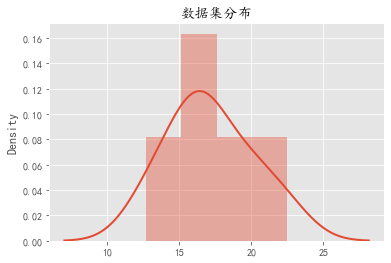

In [6]:
# 查看数据集分布
# 从下图易得数据集的分布近似于正态分布，结合样本数小于30近似于t分布。
sns.distplot(dataSer)
plt.title('数据集分布')
plt.show()

In [8]:
#导入统计模块（stats）
from scipy import stats

#总体平均值
pop_mean=20

##ttest_1samp：单独样本t检验
##返回的第1个值t是假设检验计算出的（t值），第2个值p是双尾检验的p值

t,p_two =stats.ttest_1samp(dataSer,pop_mean)

print('t值=',t) 
print('双尾检验的p值=',p_two) 

##因为scipy计算出的是双尾检验的t值和p值，但是我们这里是左尾检验。
##根据对称性，双尾的p值是对应单尾p值的2倍

#单尾检验的p值
p_one=p_two/2

print('单尾检验的p值=',p_one)

t值= -3.001649525885985
双尾检验的p值= 0.014916414248897527
单尾检验的p值= 0.0074582071244487635


In [9]:
'''
左尾判断条件：t < 0 and  p_one < 判断标准（显著水平）alpha
右尾判断条件：t > 0 and  p_one < 判断标准（显著水平）alpha
'''
#做出结论
if(t<0 and p_one< alpha): 
    #左尾判断条件
    print('拒绝零假设，有统计显著，也就是汽车引擎排放满足标准')
else: 
    print('接受零假设，没有统计显著，也就是汽车引擎排放不满足标准')

拒绝零假设，有统计显著，也就是汽车引擎排放满足标准


In [10]:
#查t分布表易得单尾检验，自由度为9对应的t值为1.833
t_ci=1.833
#使用scipy计算标准误差
se=stats.sem(dataSer)
#置信区间上限
a=sample_mean - t_ci * se
#置信区间下限
b=sample_mean + t_ci * se

print('单个平均值的置信区间，95置信水平 CI=(%f,%f)' % (a,b))

单个平均值的置信区间，95置信水平 CI=(15.441820,18.898180)


### **二、相关配对检验（检验相关或配对观测之差的平均值是否等于目标值）**

In [17]:
dict = {'Congruent':np.random.randint(1,100,10),
        'Incongruent':np.random.randint(1,100,10)
        }
data = pd.DataFrame(dict)
data.head()
data.describe()

,Congruent,Incongruent
count,10.000000,10.000000
mean,60.100000,38.500000
std,28.005753,30.456709
min,2.000000,4.000000
25%,59.250000,12.000000
50%,70.000000,35.000000
75%,77.500000,53.750000
max,84.000000,96.000000


In [18]:
# 第一组数据均值、标准差
con1_mean = data['Congruent'].mean()
con1_std = data['Congruent'].std()
print('第一组均值：',con1_mean,'第一组标准差：',con1_std)

# 第二组数据均值、标准差
con2_mean = data['Incongruent'].mean()
con2_std = data['Incongruent'].std()
print('第二组均值：',con2_mean,'第二组标准差：',con2_std)

第一组均值： 60.1 第一组标准差： 28.005753377158456
第二组均值： 38.5 第二组标准差： 30.45670880300613


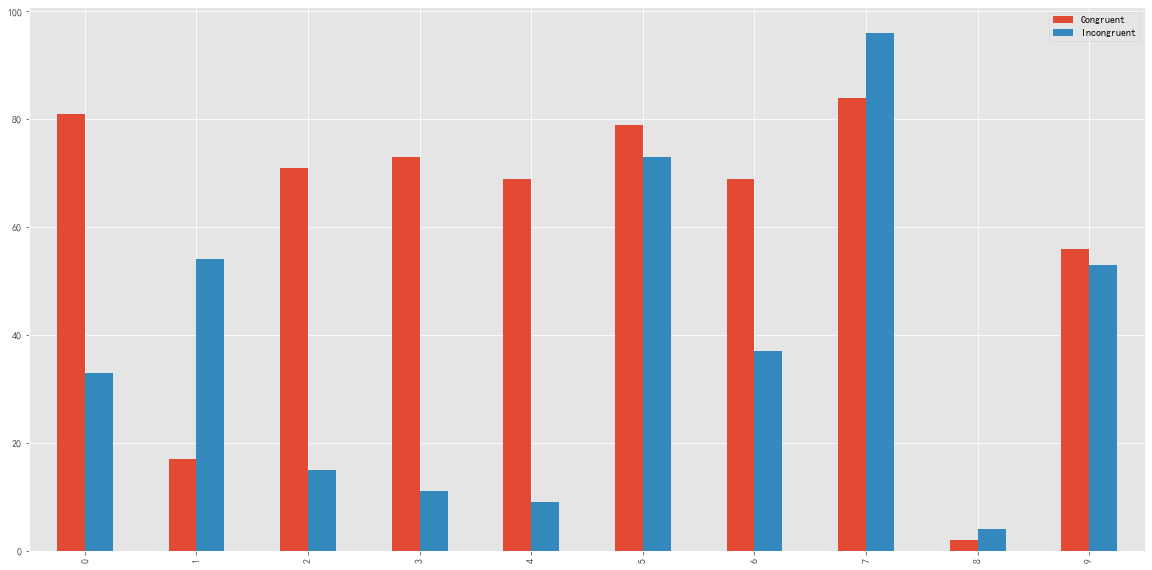

In [19]:
fg = plt.figure(figsize = (20,10))
#画纸
ax = fg.add_subplot(1,1,1)
#绘制柱状图
data.plot(kind = 'bar',ax = ax)
#显示图形
plt.show()

In [20]:
data['diff'] =data['Congruent'] -data['Incongruent']
data.head()

,Congruent,Incongruent,diff
0,81,33,48
1,17,54,-37
2,71,15,56
3,73,11,62
4,69,9,60


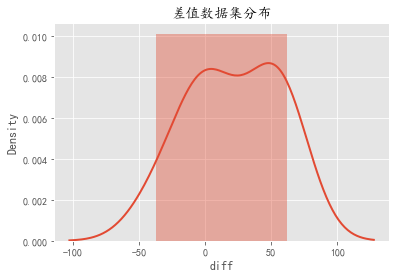

In [21]:
import seaborn as sns
#查看数据集分布
sns.distplot(data['diff'])
plt.title('差值数据集分布')
plt.show()

In [22]:
#导入统计模块（stats）
from scipy import stats
t,p_two = stats.ttest_rel(data['Congruent'],data['Incongruent'])
p_one=p_two/2
print('t值=',t,'单尾检验的p值=',p_one)

t值= 1.9713996664985332 单尾检验的p值= 0.040080714649298146


In [24]:
#显著水平使用alpha=5%
alpha=0.05
'''
左尾判断条件：t < 0 and  p_one < 判断标准（显著水平）alpha
右尾判断条件：t > 0 and  p_one < 判断标准（显著水平）alpha
'''
#做出结论
if(t<0 and p_one< alpha):
    print('拒绝零假设，有统计显著')
    print('也就是接受备选假设：特鲁普效应存在')
else:
    print('接受备选假设，没有统计显著，也就是特鲁普效应不存在')

接受备选假设，没有统计显著，也就是特鲁普效应不存在


In [25]:
t_ci=1.711
#差值数据集平均值
sample_mean=data['diff'].mean()
#使用scipy计算标准误差
se=stats.sem(data['diff'])
#置信区间上限
a=sample_mean - t_ci * se
#置信区间下限
b=sample_mean + t_ci * se
print('两个平均值差值的置信区间，95置信水平 CI=[%f,%f]' % (a,b))

两个平均值差值的置信区间，95置信水平 CI=[2.853116,40.346884]


In [26]:
pop_mean=0
#差值数据集的标准差
sample_std=data['diff'].std()
d=np.abs((sample_mean - pop_mean) / sample_std)
print('d=',d)

d= 0.6234113124631705


In [ ]:
"""
3.数据分析报告总结

1、描述统计分析

第一组样本数据：字体内容和字体颜色一致情况下，平均反应时间是: 13.92 秒,标准差是 3.54 秒
第二组样本数据：字体内容和字体颜色不一致情况下，平均反应时间是: 22.35 秒,标准差是 5.01 秒
“不一致”情况下所用时间均大于“一致”情况，也就是当字体内容和字体验证不一致时，实验者的平均反应时间变长

2、推论统计分析
1）假设检验
相关配对检验t(24)=-8.09,p=p=1.77e-08 (α=5%),左尾检验
统计上存在显著差异，拒绝零假设，从而验证斯特鲁普效应存在。
2）置信区间
两个平均值差值的置信区间，95%置信水平 CI=[-10.205794,-6.641956]
3）效应量
d= 1.65
"""

### **三、独立双样本检验（检验两个独立样本的平局值之差是否等于目标值）**

1.描述统计分析 https://zhuanlan.zhihu.com/p/148550428

In [30]:
dict = {'A':np.random.randint(1,100,10),
        'B':np.random.randint(1,100,10)
        }
data = pd.DataFrame(dict)
data.head()

,A,B
0,37,74
1,5,33
2,25,19
3,18,20
4,61,90


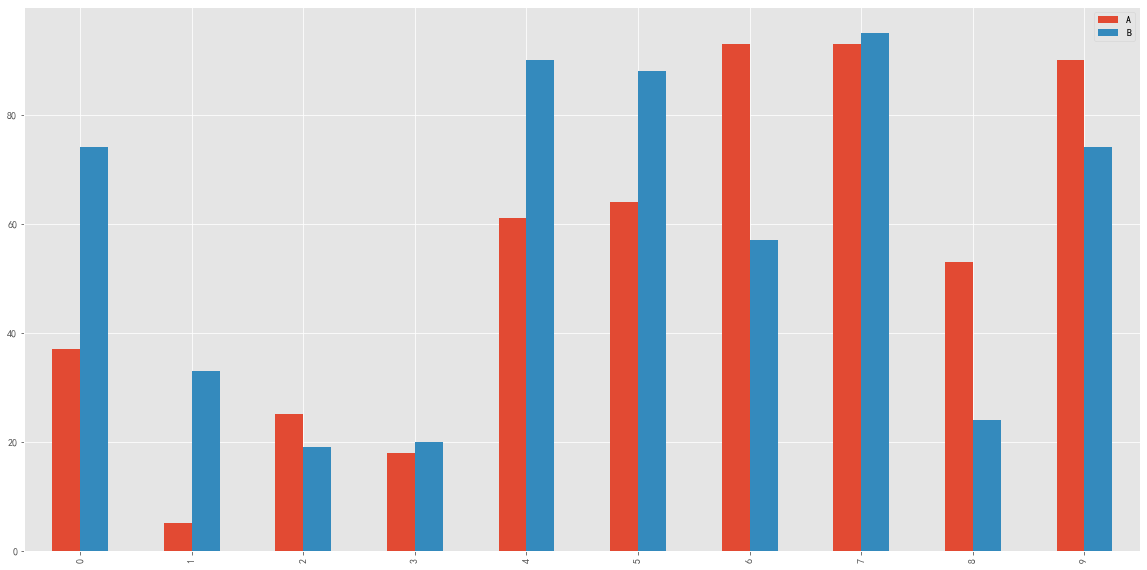

In [31]:
fg = plt.figure(figsize = (20,10))
#画纸
ax = fg.add_subplot(1,1,1)
#绘制柱状图
data.plot(kind = 'bar',ax = ax)
#显示图形
plt.show()

In [32]:
#样本平均值
a_mean=data['A'].mean()
b_mean=data['B'].mean()

print('A版本平均值=',a_mean,'单位：打错字数量')
print('B版本平均值=',b_mean,'单位：打错字数量')

#样本标准差
a_std=data['A'].std()
b_std=data['B'].std()

print('A版本样本大小25，样本标准差=',a_std,'单位：打错字数量')
print('B版本样本大小25，样本标准差=',b_std,'单位：打错字数量')

A版本平均值= 53.9 单位：打错字数量
B版本平均值= 57.4 单位：打错字数量
A版本样本大小25，样本标准差= 32.171243197751764 单位：打错字数量
B版本样本大小25，样本标准差= 30.819185943535597 单位：打错字数量


2.推论统计分析

In [ ]:
"""
1.零假设和备选假设

要研究的问题是：哪个键盘布局对用户体验更好呢？根据这个问题我提出来下面两个互为相反的假设。
零假设：A版本和B版本没有差别，也就是A版本平均值等于B版本平均值。(零假设总是表述为研究没有改变，
没有效果，不起作用等，这里就是不满足标准。)
备选假设：A版本和B版本有差别，也就是A版本平均值不等于B版本平均值。

2.检验类型

因为这里有2组样本，是不同的人，所以选择双独立样本检验。

3.抽样分布类型

在我们这个AB测试案例中，样本大小是25（小于30），属于小样本。
那小样本的抽样分布是否满足t分布呢？因为t分布还要求总体分布近似正态分布，但是总体分布我们是不知道的，
我们可以通过样本数据集的分布来推断总体分布。
"""

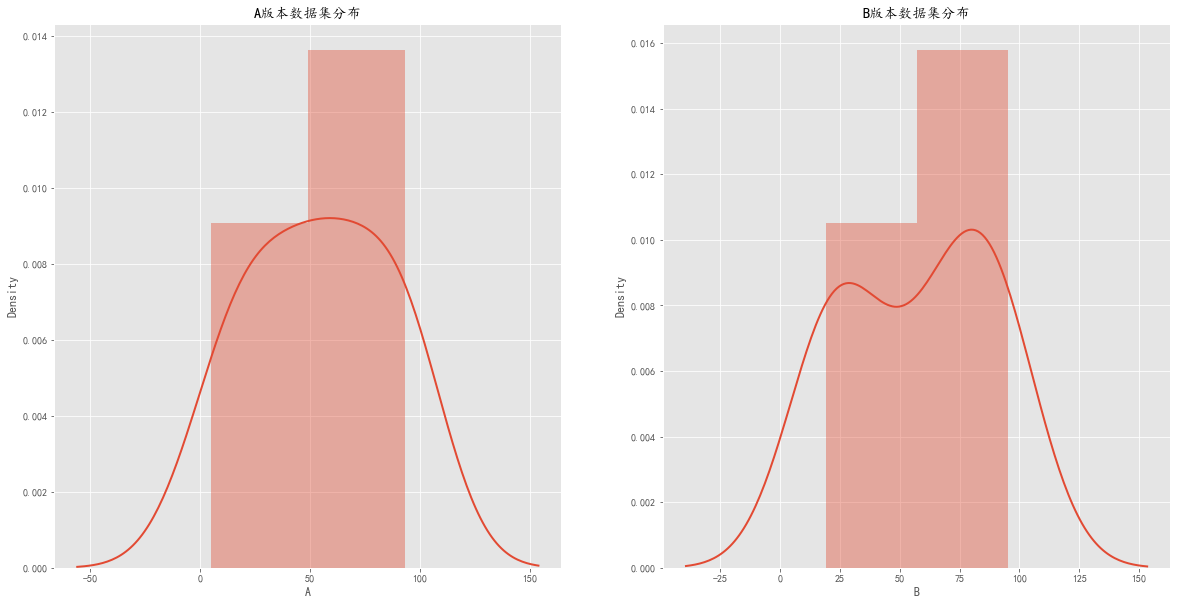

In [33]:
import seaborn as sns
fg = plt.figure(figsize = (20,10))
#画纸
fg.add_subplot(1,2,1)
#查看数据集分布
sns.distplot(data['A'])
plt.title('A版本数据集分布')
fg.add_subplot(1,2,2)
sns.distplot(data['B'])
plt.title('B版本数据集分布')
plt.show()

4.检验方向

In [35]:
import statsmodels.stats.weightstats as st  
t,p_two,df=st.ttest_ind(data['A'],data['B'],usevar='unequal')

#自由度一般只保留整数部分
print('t=',t,'p_two=',p_two,',df=',int(df))

t= -0.24843252481419548 p_two= 0.8066171793487775 ,df= 17


5.做出结论

In [36]:
#判断标准（显著水平）使用alpha=5%
alpha=0.05
if(p_two< alpha): 
    print('拒绝零假设，有统计显著，也就是接受备选假设')
    print('备选假设：A版本和B版本有差异')
else: 
    print('接受零假设，没有统计显著')
    print('零假设：A版本和B版本没有差异')


接受零假设，没有统计显著
零假设：A版本和B版本没有差异


6.置信区间

In [37]:
t_ci=2.0141

#样本大小n
a_n = 25
b_n = 25
se=np.sqrt( np.square(a_std)/a_n + np.square(b_std)/b_n )
sample_mean=a_mean - b_mean
#置信区间上限
a=sample_mean - t_ci * se
#置信区间下限
b=sample_mean + t_ci * se
print('两个平均值差值的置信区间，95置信水平 CI=[%f,%f]' % (a,b))

两个平均值差值的置信区间，95置信水平 CI=[-21.446122,14.446122]


7.效应量

In [38]:
#合并标准差
sp=np.sqrt(((a_n-1)*np.square(a_std) + (b_n-1)* np.square(a_std) ) / (a_n+b_n-2))
#效应量Cohen's d
d=np.abs((a_mean - b_mean) / sp)

print('d=',d)

d= 0.10879281159531291


In [ ]:
"""
3.数据分析报告

1、描述统计分析
A版本打错字数量 平均是5.08个，标准差是2.06个
B版本打错字数量 平均是7.8个，标准差是2.65个

2、推论统计分析
1）假设检验 独立双样本t(45)=-4.05 , p=.00019 (α=5%) , 双尾检验,拒绝零假设，统计显著。
2）置信区间 两个平均值差值的置信区间， 95%置信水平 CI=[-2.76,-2.68]
3）效应量 d= - 1.32，效果显著
"""